In [13]:
import torch

file_path = "/content/run1b_2018-05-29-14-02-47.kinect_color.pt"  # Replace with your actual file path
data = torch.load(file_path)

# Check the type of data and count arrays
if isinstance(data, dict):
    total_arrays = len(data)
elif isinstance(data, list) or isinstance(data, tuple):
    total_arrays = len(data)
elif isinstance(data, torch.Tensor):
    total_arrays = 1  # A single tensor counts as one array
else:
    total_arrays = 0  # Unknown format

print(f"Total number of arrays in {file_path}: {total_arrays}")


Total number of arrays in /content/run1b_2018-05-29-14-02-47.kinect_color.pt: 19071


<ipython-input-13-c1f005d25ee7>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(file_path)


# **Data Manipulations**

In [14]:
import pandas as pd
import pickle


with open('annotation_converter.pkl', 'rb') as f:
    annotation_converter = pickle.load(f)


activity_to_annotation = {activity: idx for idx, activity in enumerate(annotation_converter)}

file_path = '/content/Run1.csv'
data = pd.read_csv(file_path)


data = data[['frame_start', 'frame_end', 'annotation_id', 'activity']]

expanded_rows = []
for _, row in data.iterrows():
    for frame in range(row['frame_start'], row['frame_end'] + 1):
        expanded_rows.append({
            'frame': frame,
            'annotation': row['annotation_id'],
            'activity': row['activity']
        })


expanded_data = pd.DataFrame(expanded_rows)

def update_annotations(row):
    if pd.isna(row['annotation']) and pd.isna(row['activity']):
        return 40  # Label as 40 for no annotation and no activity
    elif row['activity'] == 'NA':
        return 40
    elif row['activity'] in activity_to_annotation:
        return activity_to_annotation[row['activity']]
    else:
        return row['annotation'] if 0 <= row['annotation'] <= 33 else None

expanded_data['annotation'] = expanded_data.apply(update_annotations, axis=1)
expanded_data['activity'] = expanded_data['activity'].where(expanded_data['annotation'] != 40, '')

expanded_data = expanded_data[['frame', 'annotation', 'activity']]

updated_file_path = 'RUN1updated_file_with_annotations.csv'
expanded_data.to_csv(updated_file_path, index=False)
print(f"Updated file saved to {updated_file_path}")


Updated file saved to RUN1updated_file_with_annotations.csv


In [15]:
import torch
import pandas as pd
import pickle

file_path = "/content/run2_2018-05-29-14-33-44.kinect_color.pt"
data = torch.load(file_path)

if isinstance(data, dict):
    total_arrays = len(data)
elif isinstance(data, list) or isinstance(data, tuple):
    total_arrays = len(data)
elif isinstance(data, torch.Tensor):
    total_arrays = 1
else:
    total_arrays = 0

print(f"Total number of arrays in {file_path}: {total_arrays}")

with open('annotation_converter.pkl', 'rb') as f:
    annotation_converter = pickle.load(f)

activity_to_annotation = {activity: idx for idx, activity in enumerate(annotation_converter)}

file_path = '/content/Run1.csv'
data = pd.read_csv(file_path)

data = data[['frame_start', 'frame_end', 'annotation_id', 'activity']]

expanded_rows = []
current_frame = 0
for _, row in data.iterrows():
    start_frame = row['frame_start']
    end_frame = row['frame_end']

    while current_frame < start_frame:
        expanded_rows.append({
            'frame': current_frame,
            'annotation': 40,
            'activity': ''
        })
        current_frame +=1

    for frame in range(start_frame, end_frame + 1):
        expanded_rows.append({
            'frame': frame,
            'annotation': row['annotation_id'],
            'activity': row['activity']
        })
        current_frame += 1

#Add extra frames up to no. of frames in the video
while current_frame <= 19071:
    expanded_rows.append({
        'frame': current_frame,
        'annotation': 40,
        'activity': ''
    })
    current_frame += 1


expanded_data = pd.DataFrame(expanded_rows)


def update_annotations(row):
    if pd.isna(row['annotation']) and pd.isna(row['activity']):
        return 40  # Label as 40 for no annotation and no activity
    elif row['activity'] == 'NA':
        return 40
    elif row['activity'] in activity_to_annotation:
        return activity_to_annotation[row['activity']]
    else:
        return row['annotation'] if 0 <= row['annotation'] <= 33 else None

expanded_data['annotation'] = expanded_data.apply(update_annotations, axis=1)
expanded_data['activity'] = expanded_data['activity'].where(expanded_data['annotation'] != 40, '')

expanded_data = expanded_data[['frame', 'annotation', 'activity']]

updated_file_path = 'Run1updated_file_with_annotations.csv'
expanded_data.to_csv(updated_file_path, index=False)
print(f"Updated file saved to {updated_file_path}")


<ipython-input-15-bc902a3f625b>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(file_path)


Total number of arrays in /content/run2_2018-05-29-14-33-44.kinect_color.pt: 21437
Updated file saved to Run1updated_file_with_annotations.csv


In [16]:
import pandas as pd

def process_csv(file_path):
    try:
        df = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return

    # Fill blank cells in 'annotation' column with 40
    df['annotation'] = df['annotation'].fillna(40)

    # Convert all other data to integers, handling errors
    for col in df.columns:
      if col != 'activity':
        try:
            df[col] = df[col].astype(int)
        except ValueError as e:
            print(f"Error converting column '{col}' to integer: {e}")
            # Attempt to convert to integer after removing decimal part
            df[col] = df[col].astype(str).str.split('.').str[0].astype(int, errors='ignore')


    df.to_csv(file_path, index=False)
    print(f"File '{file_path}' processed and saved successfully.")


file_path = "/content/Run1updated_file_with_annotations.csv"
process_csv(file_path)


File '/content/Run1updated_file_with_annotations.csv' processed and saved successfully.


# **Model Training with more data** - LSTM

Length of tensor data: 40508
Length of annotations: 40508
Epoch [1/100], Loss: 1.2313, Accuracy: 60.95%
Epoch [2/100], Loss: 0.9158, Accuracy: 64.38%
Epoch [3/100], Loss: 0.8973, Accuracy: 64.39%
Epoch [4/100], Loss: 0.8901, Accuracy: 64.37%
Epoch [5/100], Loss: 0.8869, Accuracy: 64.41%
Epoch [6/100], Loss: 0.8849, Accuracy: 64.35%
Epoch [7/100], Loss: 0.8827, Accuracy: 64.40%
Epoch [8/100], Loss: 0.8819, Accuracy: 64.40%
Epoch [9/100], Loss: 0.8808, Accuracy: 64.40%
Epoch [10/100], Loss: 0.8802, Accuracy: 64.41%
Epoch [11/100], Loss: 0.8794, Accuracy: 64.42%
Epoch [12/100], Loss: 0.8794, Accuracy: 64.42%
Epoch [13/100], Loss: 0.8786, Accuracy: 64.44%
Epoch [14/100], Loss: 0.8785, Accuracy: 64.31%
Epoch [15/100], Loss: 0.8780, Accuracy: 64.40%
Epoch [16/100], Loss: 0.8778, Accuracy: 64.44%
Epoch [17/100], Loss: 0.8781, Accuracy: 64.42%
Epoch [18/100], Loss: 0.8777, Accuracy: 64.36%
Epoch [19/100], Loss: 0.8770, Accuracy: 64.44%
Epoch [20/100], Loss: 0.8771, Accuracy: 64.45%
Epoch [21/1

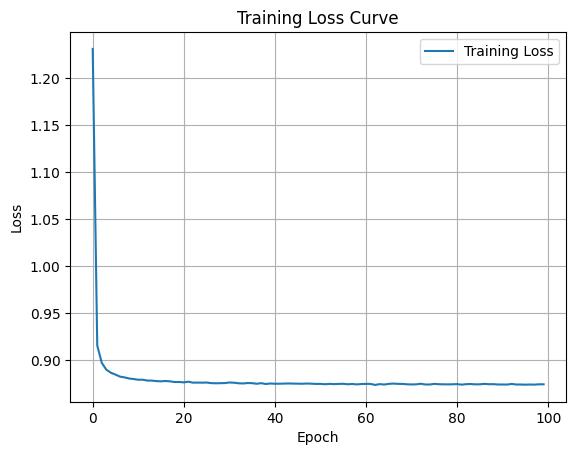

In [21]:
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import glob


tensor_data_paths = glob.glob("/content/tensors/*.pt")
annotations_paths = glob.glob("/content/data/*.csv")


tensor_data_paths.sort()
annotations_paths.sort()


tensor_annotation_mapping = {tensor_data_paths[i]: annotations_paths[i] for i in range(len(tensor_data_paths))}

all_tensor_data = []
all_annotations = []


for tensor_path, annotation_path in zip(tensor_data_paths, annotations_paths):

    tensor_data = torch.load(tensor_path, weights_only=False)
    if isinstance(tensor_data, list):
        tensor_data = torch.tensor(tensor_data, dtype=torch.float32)
    tensor_data_indices = torch.argmax(tensor_data, dim=1)  # Convert class probabilities to indices
    all_tensor_data.append(tensor_data_indices)

    # Load annotations
    annotations_df = pd.read_csv(annotation_path, skiprows=1)  # Skip header row
    #annotations_df = annotations_df.replace('NA', -1)  # Replace missing values with -1
    annotations = annotations_df.iloc[:, -1].values
    all_annotations.append(annotations)

all_tensor_data = torch.cat(all_tensor_data, dim=0)  # Concatenate all tensor data
all_annotations = np.concatenate(all_annotations, axis=0)  # Concatenate all annotations

if not np.issubdtype(all_annotations.dtype, np.number):
    label_encoder = LabelEncoder()
    all_annotations_numeric = label_encoder.fit_transform(all_annotations)
else:
    all_annotations_numeric = all_annotations

print(f"Length of tensor data: {len(all_tensor_data)}")
print(f"Length of annotations: {len(all_annotations_numeric)}")


class TemporalActivityDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

dataset = TemporalActivityDataset(all_tensor_data, all_annotations_numeric)
data_loader = DataLoader(dataset, batch_size=64, shuffle=True)

class TemporalActivityModel(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(TemporalActivityModel, self).__init__()
        self.embedding = torch.nn.Embedding(input_dim, hidden_dim)  # Embedding layer for indices
        self.lstm = torch.nn.LSTM(hidden_dim, hidden_dim, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)  # Convert indices to embeddings
        if embedded.dim() == 2:
            embedded = embedded.unsqueeze(1)  # Add sequence dimension if missing (batch_size, 1, hidden_dim)
        lstm_out, _ = self.lstm(embedded)
        out = self.fc(lstm_out[:, -1, :])
        return out

input_dim = torch.max(all_tensor_data).item() + 1
hidden_dim = 64
output_dim = len(np.unique(all_annotations_numeric))
model = TemporalActivityModel(input_dim, hidden_dim, output_dim)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)

num_epochs = 100
train_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for inputs, labels in data_loader:
        inputs = inputs.long()
        labels = labels.long()

        optimizer.zero_grad()  # Zero the gradients
        outputs = model(inputs)  # Forward pass

        loss = criterion(outputs, labels)  # Loss calculation
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize parameters

        running_loss += loss.item()


        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)

    avg_loss = running_loss / len(data_loader)
    accuracy = (correct_predictions / total_predictions) * 100
    train_losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")


plt.plot(train_losses, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.grid(True)
plt.show()

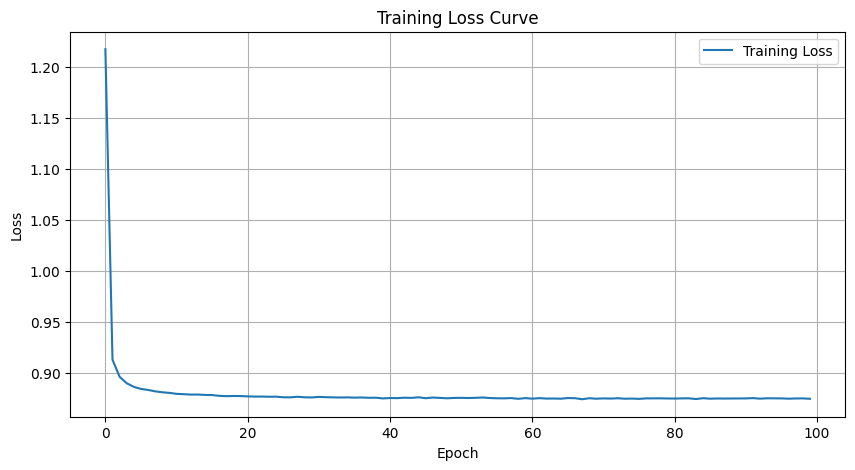

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.grid(True)
plt.show()
